###  INICIALIZAÇÃO

#### Impotação de bibliotecas

In [10]:
import os

#### Acessando o banco de dados

In [11]:
main_dir = r'C:\Users\Vitor\Desktop\IC\Cod\maquinavirtual\maqvirtual'
os.chdir(main_dir)
#pwd, ls


####  E-mails

senha : pecuaria007
senha app: xaeliekypnnpjiqv

In [13]:
########################## Usar esse para baixar imagem ##########################
import email
import imaplib

EMAIL = 'vitorhgsd@gmail.com'
PASSWORD = 'xaeliekypnnpjiqv'
SERVER = 'imap.gmail.com'


# abriremos uma conexão com SSL com o servidor de emails
# logando e navegando para a inbox
mail = imaplib.IMAP4_SSL(SERVER)
mail.login(EMAIL, PASSWORD)
# selecionamos a caixa de entrada neste caso
# mas qualquer outra caixa pode ser selecionada
mail.select('inbox')

# faremos uma busca com o critério ALL para pegar
# todos os emails da inbox, esta busca retorna
# o status da operação e uma lista com
# os ids dos emails

status, data = mail.search(None, 'ALL')
#status, data = mail.search(None, ('UNSEEN'))

# data é uma lista com ids em blocos de bytes separados
# por espaço neste formato: [b'1 2 3', b'4 5 6']
# então para separar os ids primeiramente criaremos
# uma lista vazia
mail_ids = []
# e em seguida iteramos pelo data separando os blocos
# de bytes e concatenando a lista resultante com nossa
# lista inicial
for block in data:
    # a função split chamada sem nenhum parâmetro
    # transforma texto ou bytes em listas usando como
    # ponto de divisão o espaço em branco:
    # b'1 2 3'.split() => [b'1', b'2', b'3']
    mail_ids += block.split()

# agora para cada id baixaremos o email
# e extrairemos seu conteúdo
for i in mail_ids:
    # a função fetch baixa o email passando id e o formato
    # em que você deseja que a mensagem venha
    status, data = mail.fetch(i, '(RFC822)')
   # data1 = data.copy()
    #data[0][1]= data[0][1].decode('utf-8')

    # data no formato '(RFC822)' vem em uma lista com a
    # tupla onde o conteúdo está e o byte de fechamento b')'
    # por isso vamos iterar pelo data extraindo a tupla
    # o primeiro elemento da tupla é o cabeçalho
    # de formatação e o segundo elemento possuí o
    # conteúdo que queremos extrair
    message1 = email.message_from_string(data[0][1].decode('utf-8'))

    for a in message1.walk():
        #print('AA:\n',a)
        #print('===========fim do a ----------------')
        if a.get_content_type() == 'image/jpeg':
            fileName = a.get_filename()
            foto = a.get_payload(decode=True)
            print('fileName2: ',fileName)
            with open(f'Imagem\{fileName}','wb')as arquivo:
                arquivo.write(foto)

        if a.get_content_type() == 'application/octet-stream':
            fileName = a.get_filename()
            foto = a.get_payload(decode=True)
            print('fileName1: ',fileName)
            with open(f'Imagem\{fileName}','wb')as arquivo:
                arquivo.write(foto)

        if a.get_content_type() == 'text/plain':
            msg = a.get_payload()
            print('mensagem: ',msg)

        if a.get('Subject') is not None:
            ass = a.get('Subject') 
            print('assunto: ',ass)


    print('id = ',i)
    print('------------------------outro email-----------------------------------------------')



assunto:  foto assunto 24 de jul de 2022 13:04:52
mensagem:  teste

fileName:  20220724_130452.jpg
id =  b'1'
------------------------outro email-----------------------------------------------
assunto:  Test
mensagem:  Tets

id =  b'2'
------------------------outro email-----------------------------------------------
assunto:  Test galeria
mensagem:  Texto

fileName:  20220724_181051.jpg
fileName:  20220724_181047.jpg
id =  b'3'
------------------------outro email-----------------------------------------------


### Acessando as informações da imagem


In [18]:
### pip install exif
from exif import Image

name_img = '20220724_181047.jpg'
end_img =  r'C:\Users\Vitor\Desktop\IC\Cod\maquinavirtual\maqvirtual\Imagem\\'+ name_img
with open(end_img, 'rb') as arq_img: ## wb escrita
    img = Image(arq_img)
    print(img.has_exif)

True


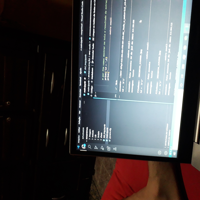

In [20]:
from PIL import Image

imag = Image.open(end_img)
imag.resize((200,200))

In [21]:
img.list_all()

['image_width',
 'model',
 'image_height',
 'software',
 'make',
 '_exif_ifd_pointer',
 'orientation',
 'datetime',
 '_gps_ifd_pointer',
 'datetime_original',
 'photographic_sensitivity',
 'datetime_digitized',
 'focal_length',
 'metering_mode',
 'exposure_program',
 'exposure_time',
 'flash',
 'light_source',
 'f_number',
 'gps_latitude',
 'gps_altitude',
 'gps_latitude_ref',
 'gps_speed',
 'gps_altitude_ref',
 'gps_speed_ref',
 'gps_longitude_ref',
 'gps_longitude']

In [22]:
print(img.gps_latitude)
print(img.gps_latitude_ref)
print(img.gps_longitude)
print(img.gps_longitude_ref)

(20.0, 41.0, 59.851)
S
(56.0, 45.0, 24.667)
W


In [23]:
# graus decimais
def dec_coord(coords, ref): 
    decimal_degrees = coords[0] + coords[1] / 60 + coords[2] / 3600 
    if ref == 'S' or ref == 'W': 
        decimal_degrees = -decimal_degrees 
    return decimal_degrees

dec_lat = dec_coord(img.gps_latitude,img.gps_latitude_ref)
dec_lon = dec_coord(img.gps_longitude, img.gps_longitude_ref)

print(dec_lat,dec_lon)

-20.69995861111111 -56.75685194444444


### Acessando a planilha do excel

In [77]:
# pip install openpyxl
# pip install padas

import pandas as pd

d = {'fileName': [1,2,3], 'Coordenada':[22,33,55], 'Data':[666,888,999] }



In [86]:
d

{'Name': [1, 2, 3], 'Coordenada': [22, 33, 55], 'Data': [666, 888, 999]}

In [87]:
d['Name'].append(4)
d["Coordenada"].append(66)
d["Data"].append(444)

In [88]:
d

{'Name': [1, 2, 3, 4],
 'Coordenada': [22, 33, 55, 66],
 'Data': [666, 888, 999, 444]}

In [89]:
#Gravar os dados em excel
dados = pd.DataFrame(data=d)
dados.to_excel(f'{main_dir}\Dados\dados.xlsx', index=False)